In [2]:
library(Seurat)

Attaching SeuratObject

Attaching sp



In [3]:
library(Signac)
library(readr)

In [4]:
seurat <- readRDS("/Users/dominik.klein/data/E14-E15_adata_filtered_seurat.rds")

In [4]:
seurat

An object of class Seurat 
487835 features across 16978 samples within 3 assays 
Active assay: ATAC (228321 features, 0 variable features)
 2 other assays present: RNA, ATAC_merged

In [31]:
#seurat@meta.data$sample <- sapply(rownames(seurat@meta.data), function(x){strsplit(x,"_")[[1]][1]})
#Idents(seurat) <- seurat@meta.data$sample

In [32]:
#DefaultAssay(seurat) <- "RNA"
#seurat <- SCTransform(seurat, verbose = TRUE, return.only.var.genes = FALSE, variable.features.n = NULL, vst.flavor = "v2")


vst.flavor='v2' set, setting model to use fixed slope and exclude poisson genes.



In [ ]:
#seurat <- RunPCA(seurat)

In [ ]:
#seurat <- RunUMAP(seurat, dims = 1:50, reduction.name = 'umap.rna', reduction.key = 'rnaUMAP_')

In [5]:
DefaultAssay(seurat) <- "ATAC_merged"
seurat <- RunTFIDF(seurat)


Performing TF-IDF normalization



In [7]:
seurat <- FindTopFeatures(seurat, min.cutoff = 'q0')


In [8]:
seurat <- RunSVD(seurat)

Running SVD

Scaling cell embeddings



Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Zeichenbreite unbekannt für das Zeichen 0x9”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Zeichenbreite unbekannt für das Zeichen 0x9”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Zeichenbreite unbekannt für das Zeichen 0x9”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Zeichenbreite unbekannt für das Zeichen 0x9”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Zeichenbreite unbekannt für das Zeichen 0x9”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Zeichenbreite unbekannt für das Zeichen 0x9”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Zeichenbreite unbekannt für das Zeichen 0x9”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“Zeichenbreite unbe

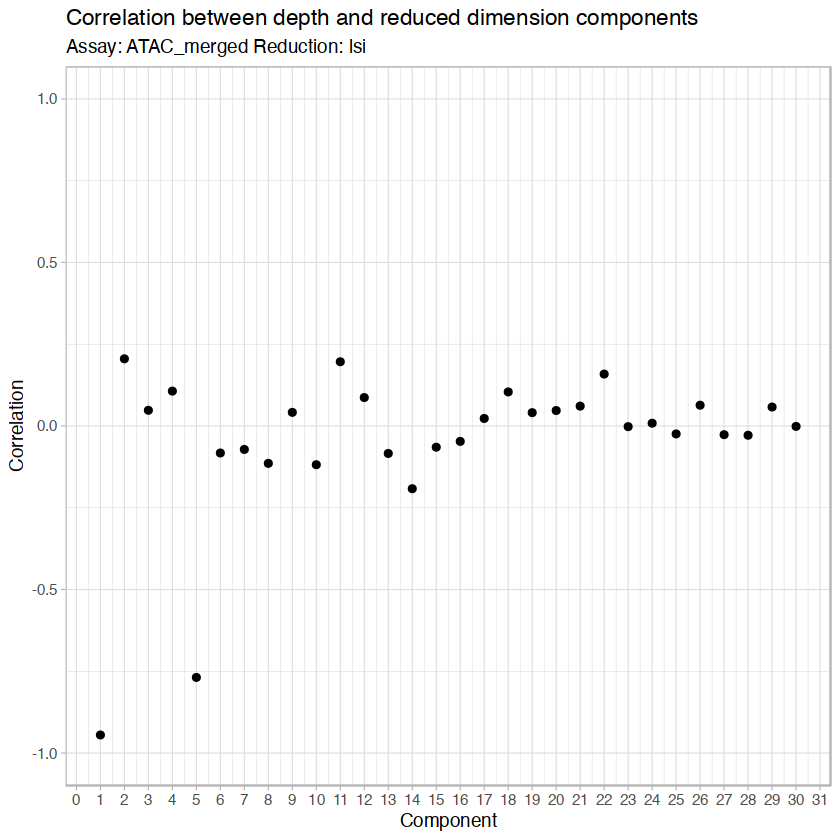

In [9]:
DepthCor(seurat, n=30) 

In [10]:
seurat_rm1 <- suppressMessages(RunUMAP(object = seurat, reduction = 'lsi', dims = c(2:40)))

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


In [15]:
seurat_rm1 <- FindNeighbors(object = seurat_rm1, reduction = 'lsi', dims = c(2:40))

Computing nearest neighbor graph

Computing SNN



In [16]:
seurat_rm1 <- FindClusters(object = seurat_rm1, verbose = FALSE, algorithm = 3)

In [17]:
dimplot1 <- DimPlot(object = seurat_rm1, label = TRUE) + NoLegend()

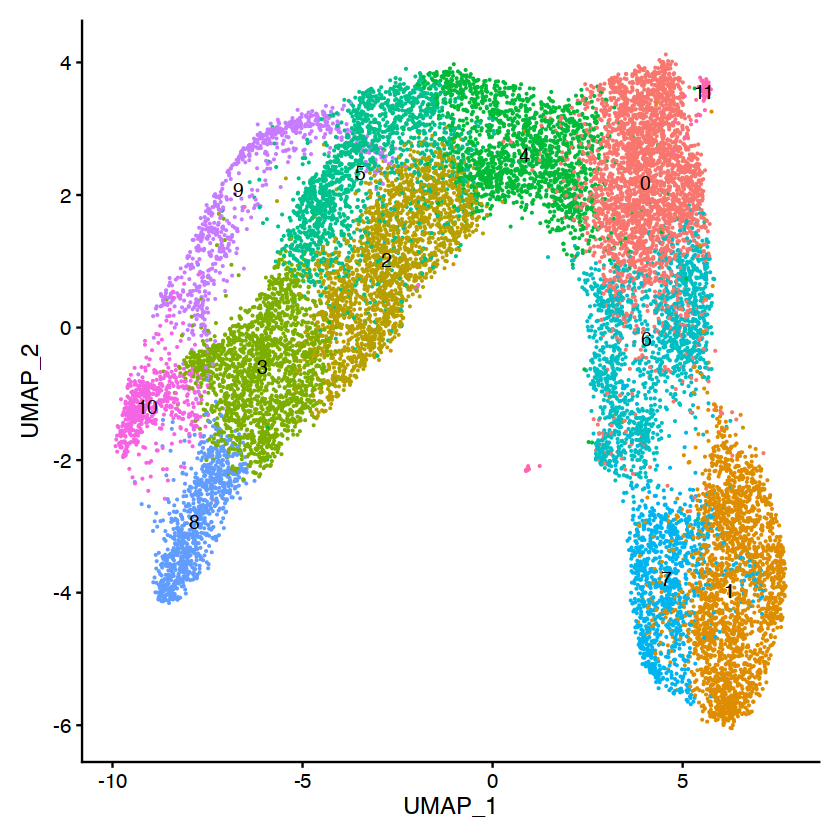

In [18]:
dimplot1

In [19]:
seurat_rm15 <- suppressMessages(RunUMAP(object = seurat, reduction = 'lsi', dims = c(1:4, 6:40)))

In [20]:
seurat_rm15 <- FindNeighbors(object = seurat_rm15, reduction = 'lsi', dims = c(1:4, 6:40))

Computing nearest neighbor graph

Computing SNN



In [21]:
seurat_rm15 <- FindClusters(object = seurat_rm15, verbose = FALSE, algorithm = 3)

In [22]:
dimplot2 <- DimPlot(object = seurat_rm15, label = TRUE) + NoLegend()

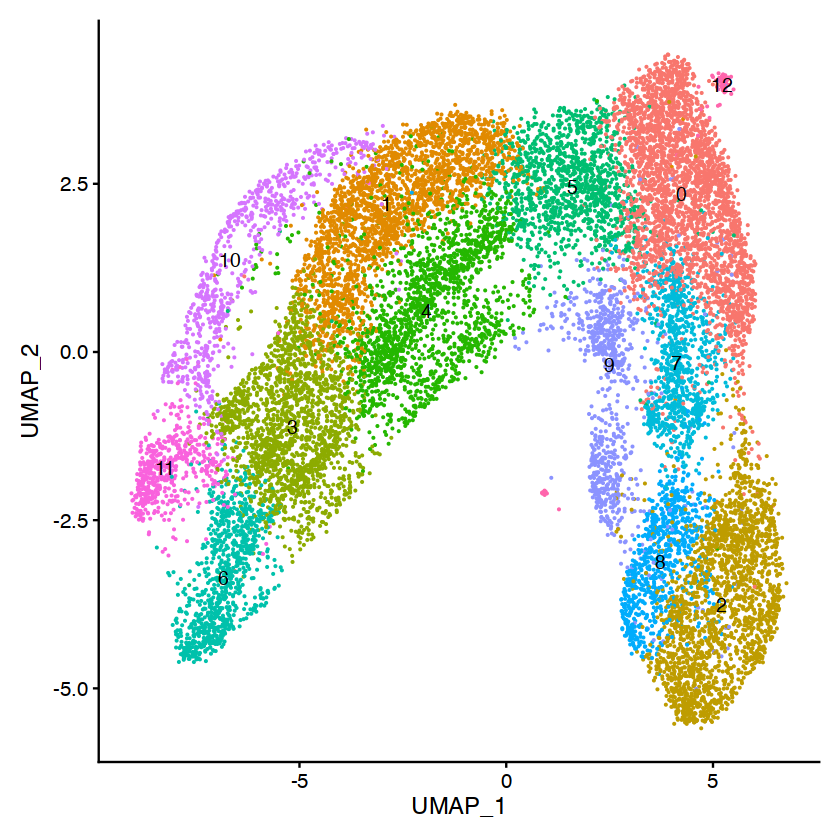

In [23]:
dimplot2

In [70]:
seurat_rm1@meta.data$sample <- seurat@meta.data$sample

In [71]:
dimplot1 <- DimPlot(object = seurat_rm1, group.by="sample")

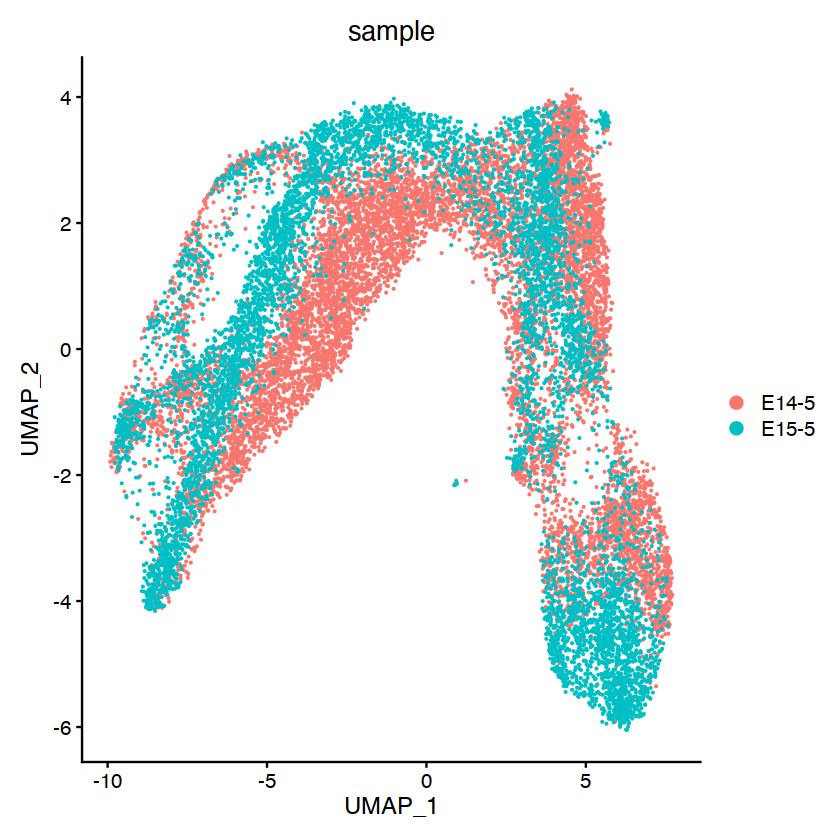

In [72]:
dimplot1

In [67]:
seurat_rm15@meta.data$sample <- seurat@meta.data$sample

In [68]:
dimplot2 <- DimPlot(object = seurat_rm15, group.by="sample")

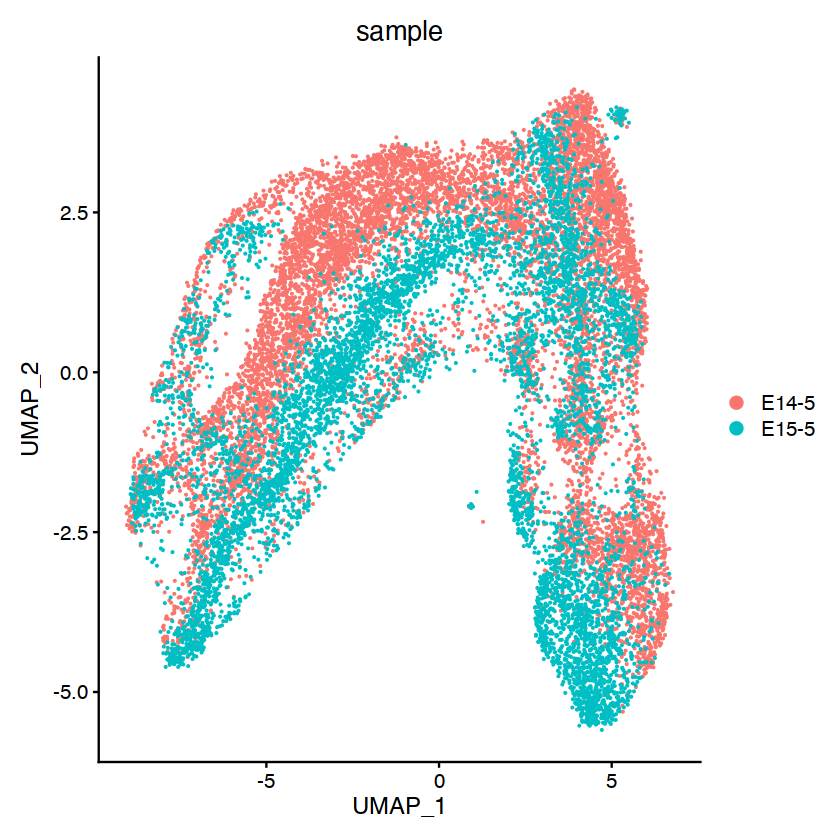

In [69]:
dimplot2

In [24]:
install.packages("anndata")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [50]:
adata <- anndata::AnnData(X=t(seurat[['ATAC_merged']]@counts))

In [51]:
adata$obsm[['lsi_full']] <- Embeddings(seurat_rm1, reduction = "lsi")
adata$obsm[['lsi_red']] <- Embeddings(seurat_rm1, reduction = "lsi")[,c(2:40)]
adata$obsm[['lsi_red2']] <- Embeddings(seurat_rm1, reduction = "lsi")[,c(1:4, 6:40)]

In [48]:
library(Matrix)

In [52]:
adata$write_h5ad("/Users/dominik.klein/data/E14-E15_lsi_peaks_to_adata.h5ad",
                compression = "gzip")

None

In [75]:
saveRDS(seurat, "/Users/dominik.klein/data/E14-E15_adata_filtered_seurat_merged_peaks.rds")